In [22]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import re

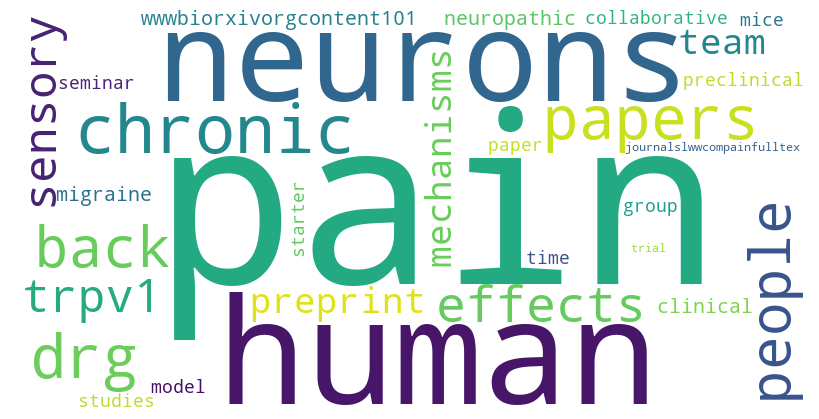

In [56]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Extract the 'text' column
text_data = data['text'].dropna()

# Combine all text into a single string
combined_text = " ".join(text_data)

# Function to clean and preprocess text
def preprocess_text(text):
    # Replace multi-word phrases with single tokens
    text = re.sub(r"starter pack", "starter_pack", text, flags=re.IGNORECASE)
    text = re.sub(r"back pain", "back_pain", text, flags=re.IGNORECASE)
    # Remove hashtagged words
    text = re.sub(r"#\w+", "", text)
    # Remove any remaining non-alphanumeric characters
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Clean the combined text
cleaned_text = clean_text(combined_text)

# Update the stopwords
custom_stopwords = set(STOPWORDS)
# Add any additional words to exclude
custom_stopwords.update(['new', 'work', 'show', 'research', 'great', 'bluesky', 'lab', 'latest', 'excited', 'look', 'interested', 'amazing', 'got', 'now', 'using', 'now', 'will', 'exciting', 'tag', 'feed', 'big', 'available', 'join', 'interesting', 'thank', 'today', 'shows', 'read', 'recently', 'congrats', 'study', 'next', 'year', 'may', 'development', 'week', 'coming', 'one', 'take', 'give', 'list', 'day', 'many', 'sharing', 'share', 'field', 'need', 'start', 'love', 'quick', 'dr', 'soon', 'welcome', 'needs', 'full', 'weve', 'fantastic', 'check', 'thanks', 'looking', 'news', 'us', 'see', 'talk', 'forward', 'science'])

# Tokenize the text and filter out stopwords
words = cleaned_text.split()
filtered_words = [word.lower() for word in words if word.lower() not in custom_stopwords]

# Count word frequencies
word_counts = Counter(filtered_words)

# Get the top 30 words
top_30_words = dict(word_counts.most_common(30))

# Generate the word cloud for top 30 words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    min_font_size=10
).generate_from_frequencies(top_30_words)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Save the figure as a .jpg file
plt.savefig('wordcloud_top_30_words.jpg', format='jpg')

plt.show()


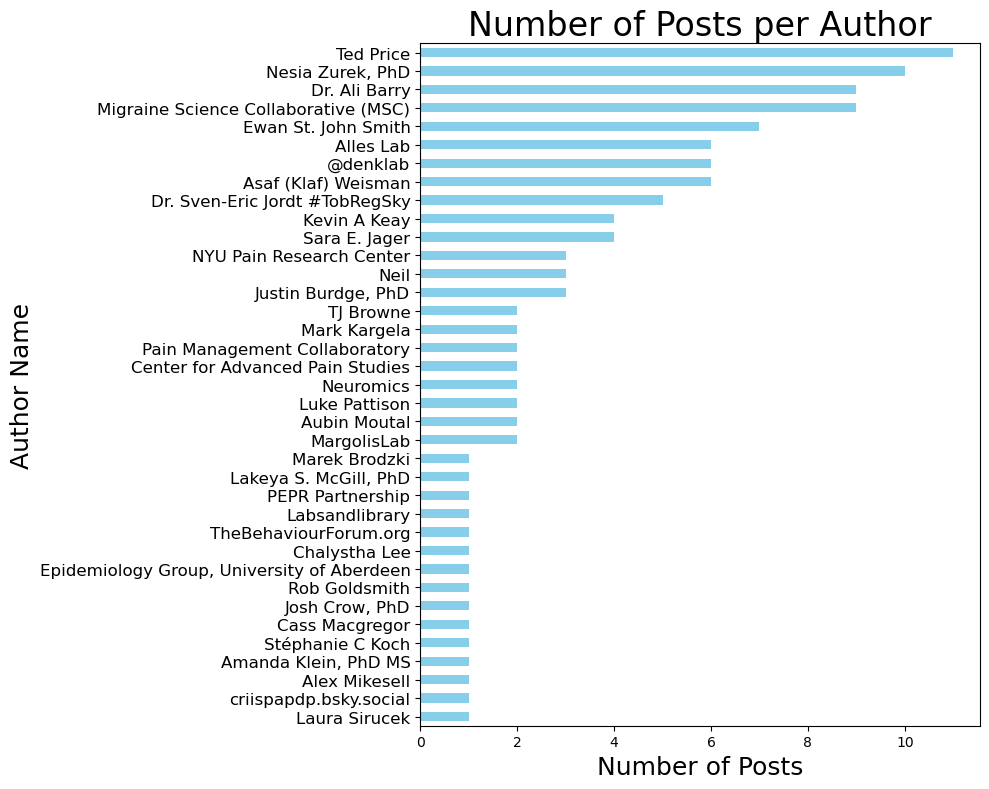

In [65]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'authorName' column exists
if 'authorName' in data.columns:
    # Get the number of posts per author
    posts_per_author = data['authorName'].value_counts()

    # Plot a horizontal bar graph
    plt.figure(figsize=(10, 8))
    posts_per_author.plot(kind='barh', color='skyblue')

    # Add labels and title
    plt.xlabel('Number of Posts', fontsize=18)
    plt.ylabel('Author Name', fontsize=18)
    plt.title('Number of Posts per Author', fontsize=24)
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    
        # Increase font size of author names on the y-axis
    plt.yticks(fontsize=12)  # Adjust this value to change the font size

    # Display the plot
    plt.tight_layout()

    # Save the figure as a .jpg file
    plt.savefig('posts_per_author.jpg', format='jpg')
    
    plt.show()
else:
    print("The column 'authorName' does not exist in the CSV file.")


Total number of likes: 1232


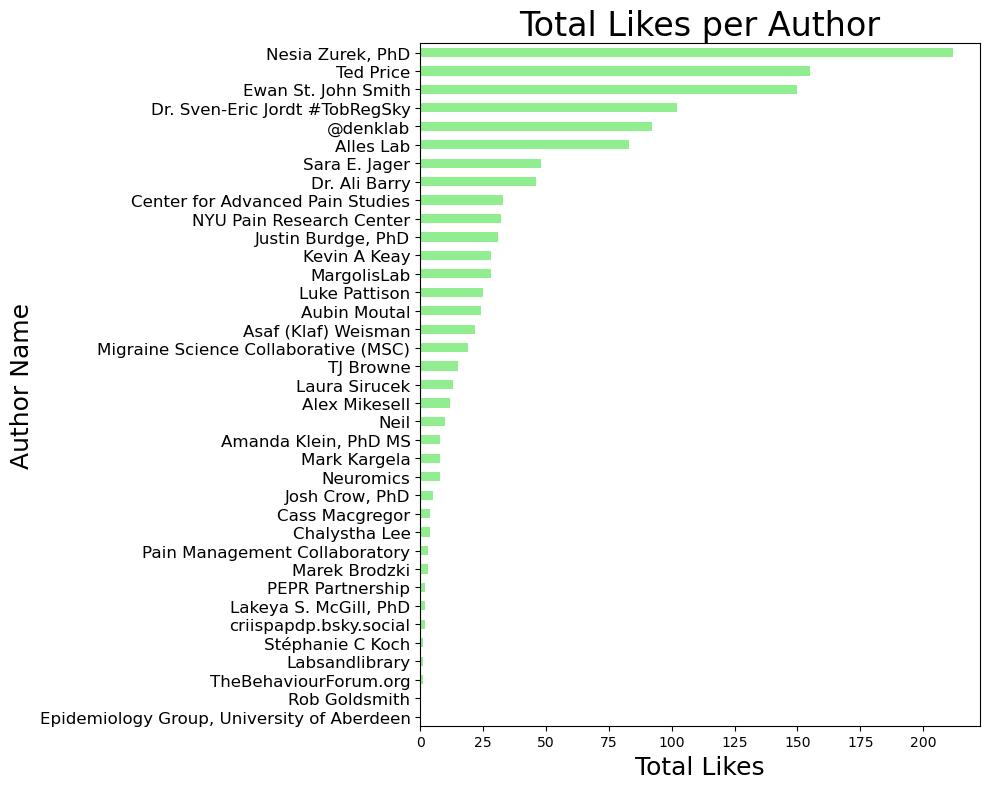

In [64]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'likeCount' and 'authorName' columns exist
if 'likeCount' in data.columns and 'authorName' in data.columns:
    # Ensure 'likeCount' is numeric
    data['likeCount'] = pd.to_numeric(data['likeCount'], errors='coerce')

    # Aggregate likeCount per author
    likes_per_author = data.groupby('authorName')['likeCount'].sum().sort_values(ascending=False)

    # Calculate total number of likes
    total_likes = data['likeCount'].sum()

    # Print total number of likes
    print(f"Total number of likes: {total_likes}")

    # Plot a horizontal bar graph
    plt.figure(figsize=(10, 8))
    likes_per_author.plot(kind='barh', color='lightgreen')

    # Add labels and title
    plt.xlabel('Total Likes', fontsize=18)
    plt.ylabel('Author Name', fontsize=18)
    plt.title('Total Likes per Author', fontsize=24)
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability

    # Increase font size of author names on the y-axis
    plt.yticks(fontsize=12)  # Adjust this value to change the font size

    # Display the plot
    plt.tight_layout()

    # Save the figure as a .jpg file
    plt.savefig('likeCount.jpg', format='jpg')
    
    plt.show()
else:
    print("The required columns ('likeCount' and 'authorName') do not exist in the CSV file.")



Total number of reposts: 216


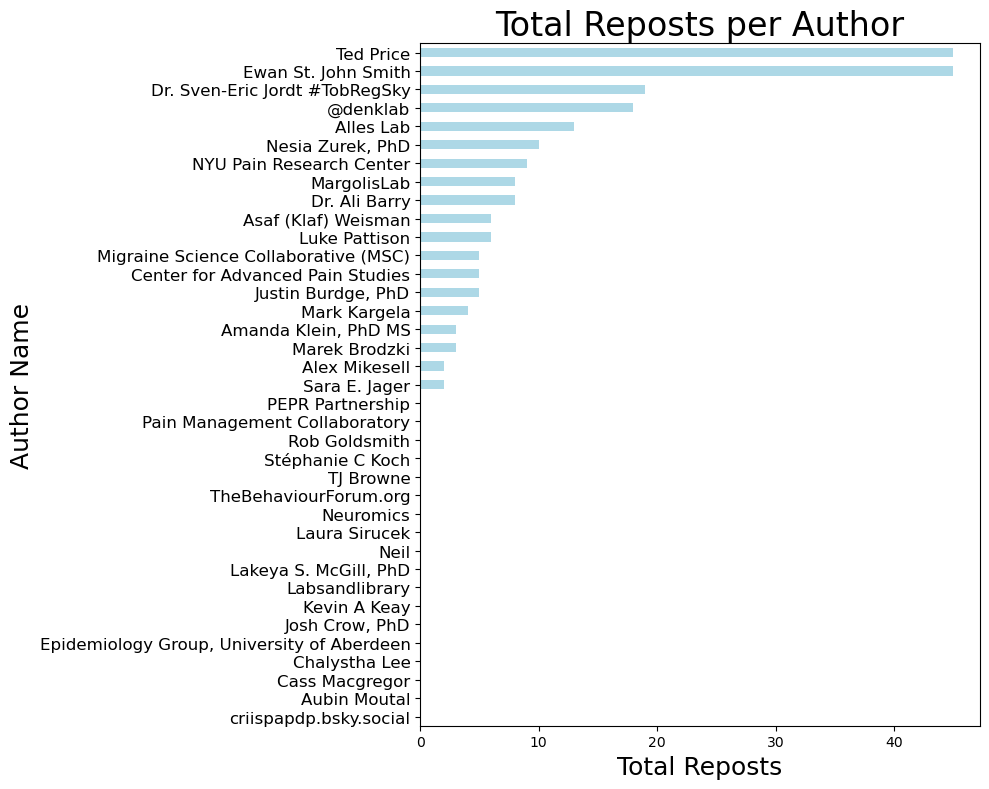

In [66]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'repostCount' and 'authorName' columns exist
if 'repostCount' in data.columns and 'authorName' in data.columns:
    # Ensure 'repostCount' is numeric
    data['repostCount'] = pd.to_numeric(data['repostCount'], errors='coerce')

    # Aggregate repostCount per author
    reposts_per_author = data.groupby('authorName')['repostCount'].sum().sort_values(ascending=False)

    # Calculate total number of likes
    total_reposts = data['repostCount'].sum()

    # Print total number of likes
    print(f"Total number of reposts: {total_reposts}")

    # Plot a horizontal bar graph
    plt.figure(figsize=(10, 8))
    reposts_per_author.plot(kind='barh', color='lightblue')

    # Add labels and title
    plt.xlabel('Total Reposts', fontsize=18)
    plt.ylabel('Author Name', fontsize=18)
    plt.title('Total Reposts per Author', fontsize=24)
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability

        # Increase font size of author names on the y-axis
    plt.yticks(fontsize=12)  # Adjust this value to change the font size

    # Display the plot
    plt.tight_layout()

    # Save the figure as a .jpg file
    plt.savefig('reposts.jpg', format='jpg')

    plt.show()
else:
    print("The required columns ('repostCount' and 'authorName') do not exist in the CSV file.")

Total number of replies: 119


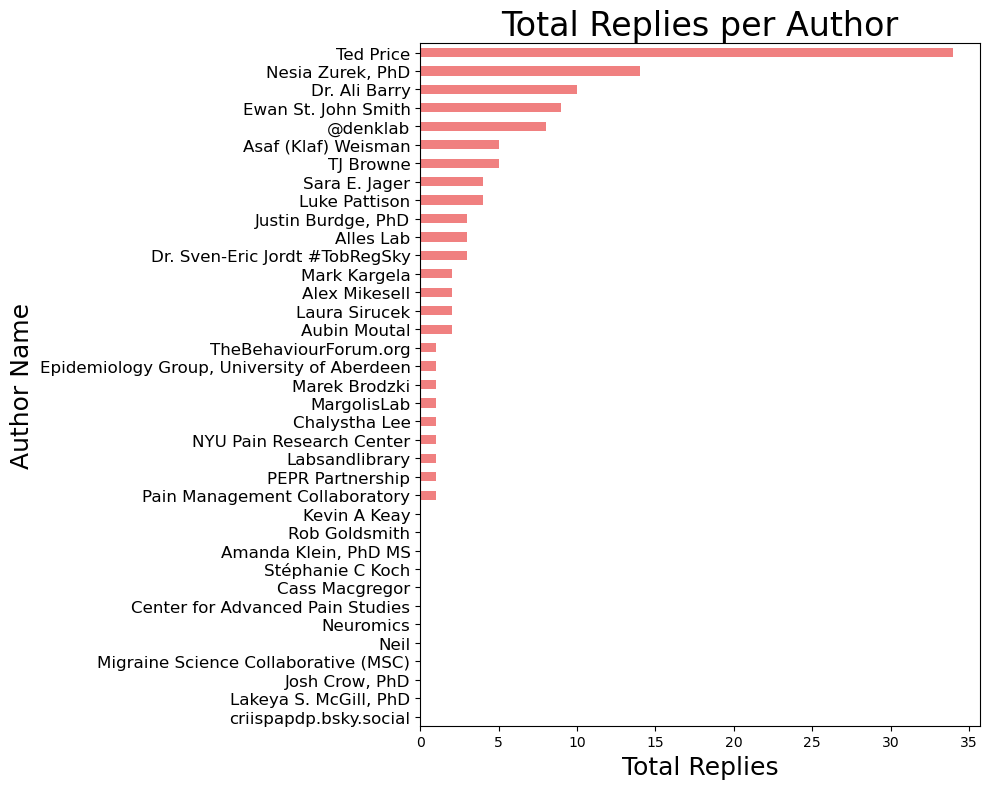

In [67]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'replyCount' and 'authorName' columns exist
if 'replyCount' in data.columns and 'authorName' in data.columns:
    # Ensure 'replyCount' is numeric
    data['replyCount'] = pd.to_numeric(data['replyCount'], errors='coerce')

    # Aggregate replyCount per author
    replies_per_author = data.groupby('authorName')['replyCount'].sum().sort_values(ascending=False)

    # Calculate total number of likes
    total_replies = data['replyCount'].sum()

    # Print total number of likes
    print(f"Total number of replies: {total_replies}")

    # Plot a horizontal bar graph
    plt.figure(figsize=(10, 8))
    replies_per_author.plot(kind='barh', color='lightcoral')

    # Add labels and title
    plt.xlabel('Total Replies', fontsize=18)
    plt.ylabel('Author Name', fontsize=18)
    plt.title('Total Replies per Author', fontsize=24)
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability

        # Increase font size of author names on the y-axis
    plt.yticks(fontsize=12)  # Adjust this value to change the font size

    # Display the plot
    plt.tight_layout()

    # Save the figure as a .jpg file
    plt.savefig('replies.jpg', format='jpg')
    
    plt.show()
else:
    print("The required columns ('replyCount' and 'authorName') do not exist in the CSV file.")


In [42]:
# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'link/uri' column exists
if 'link/uri' in data.columns:
    # Count posts with non-empty and non-NaN values in the 'link/uri' column
    posts_with_links = data['link/uri'].notna().sum()

    # Get the total number of posts
    total_posts = len(data)

    # Calculate the percentage
    percentage_with_links = (posts_with_links / total_posts) * 100

    # Print the results
    print(f"Number of posts with links/URIs: {posts_with_links}")
    print(f"Total number of posts: {total_posts}")
    print(f"Percentage of posts with links/URIs: {percentage_with_links:.2f}%")
else:
    print("The column 'link/uri' does not exist in the CSV file.")


Number of posts with links/URIs: 47
Total number of posts: 117
Percentage of posts with links/URIs: 40.17%


In [46]:
import pandas as pd

# Load the CSV file
file_path = 'dataset_bluesky-posts-scraper_2024-12-20.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Check if the 'image/0/fullsize' column exists
if 'images/0/fullsize' in data.columns:
    # Count posts with non-empty and non-NaN values in the 'image/0/fullsize' column
    posts_with_images = data['images/0/fullsize'].notna().sum()

    # Get the total number of posts
    total_posts = len(data)

    # Calculate the percentage
    percentage_with_images = (posts_with_images / total_posts) * 100

    # Print the results
    print(f"Number of posts with images: {posts_with_images}")
    print(f"Total number of posts: {total_posts}")
    print(f"Percentage of posts with images: {percentage_with_images:.2f}%")
else:
    print("The column 'images/0/fullsize' does not exist in the CSV file.")


Number of posts with images: 39
Total number of posts: 117
Percentage of posts with images: 33.33%
